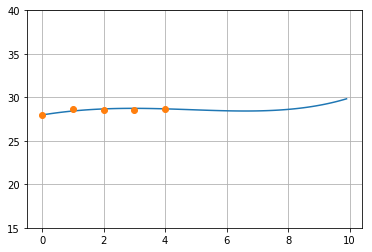

In [4]:
# Интерполяция Ньютоном 2 ????

import numpy as np
import matplotlib.pyplot as plt

fid = open("./data_var07.txt", "r")
lines = fid.readlines()
fid.close()

l1 = [float(lines[i].split(',')[1]) for i in range(1, len(lines))]
l1_new = l1[0:5]

x = [i for i in range(5)]
x_new = [i / 10 for i in range(100)]

C = []


def product(val, n):
    mul = 1
    for i in range(n):
        if i:
            mul *= val + x[i - 1]   # изменение знака на +
        yield mul


for n in range(len(x)):
    p = product(x[n], n + 1)
    C.append((l1_new[n] - sum(C[k] * next(p) for k in range(n))) / next(p))


def f(v):
    return sum(C[k] * p for k, p in enumerate(product(v, len(C))))


y_new = [f(i) for i in x_new]
plt.plot(x_new, y_new)
plt.plot(l1_new, "o")
plt.ylim(15, 40)
plt.grid(True)
plt.show()
